In [ ]:
!pip install pyspark


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.0/317.0 MB 2.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.1-py2.py3-none-any.whl size=317488490 sha256=16ba9619cf884fc6414a287a8057d386113e9c7a6625424f7481deb12aac9685
  Stored in directory: /root/.cache/pip/wheels/80/1d/60/2c256ed38dddce2fdd93be545214a63e02fbd8d74fb0b7f3a6
Successfully built pyspark


In [ ]:

import matplotlib.pyplot as plt

import os
import pandas as pd
from datetime import datetime, timedelta
import numpy as np
import os
from functools import reduce
import geopandas as gpd
import random
import warnings
import re
import sys
import warnings

# geospatial
import geopandas as gpd

# visualization
#import matplotlib.pyplot as plt
#import seaborn as sns

# widgets
import ipywidgets as widgets
from IPython.display import display
from IPython.display import Javascript

# google work environment
from google.colab import auth
from google.colab import drive
from google.colab import files

# mount google drive
drive.mount('/content/drive')

# supress all warnings
warnings.filterwarnings("ignore")

Mounted at /content/drive


In [ ]:
# Specify the path to your CSV file
file_path = '/content/drive/My Drive/Colab Notebooks/hackathon/barangay_merged (1).csv'

# Load the dataset into a DataFrame
data = pd.read_csv(file_path)

In [ ]:
# Convert the date column to datetime
data['date'] = pd.to_datetime(data['date'], errors='coerce', format='%d/%m/%Y')

In [ ]:
# Filter the data for the desired date range
filtered_data = data[(data['date'] >= '2014-01-01') & (data['date'] <= '2022-12-31')]

In [ ]:
# List of relevant columns
relevant_columns = [
    'osm_wetland_nearest', 'osm_reservoir_nearest', 'osm_water_nearest',
    'osm_riverbank_nearest', 'osm_dock_nearest', 'osm_river_nearest',
    'osm_stream_nearest', 'osm_canal_nearest', 'osm_drain_nearest',
    'toilet_nearest', 'sanitary_dump_station_nearest', 'wastewater_plant_nearest',
    'case_total'
]

# Drop rows with missing values in relevant columns
clean_data = filtered_data.dropna(subset=relevant_columns)

In [ ]:
# Calculate the correlation matrix
correlation_matrix = clean_data[relevant_columns].corr()

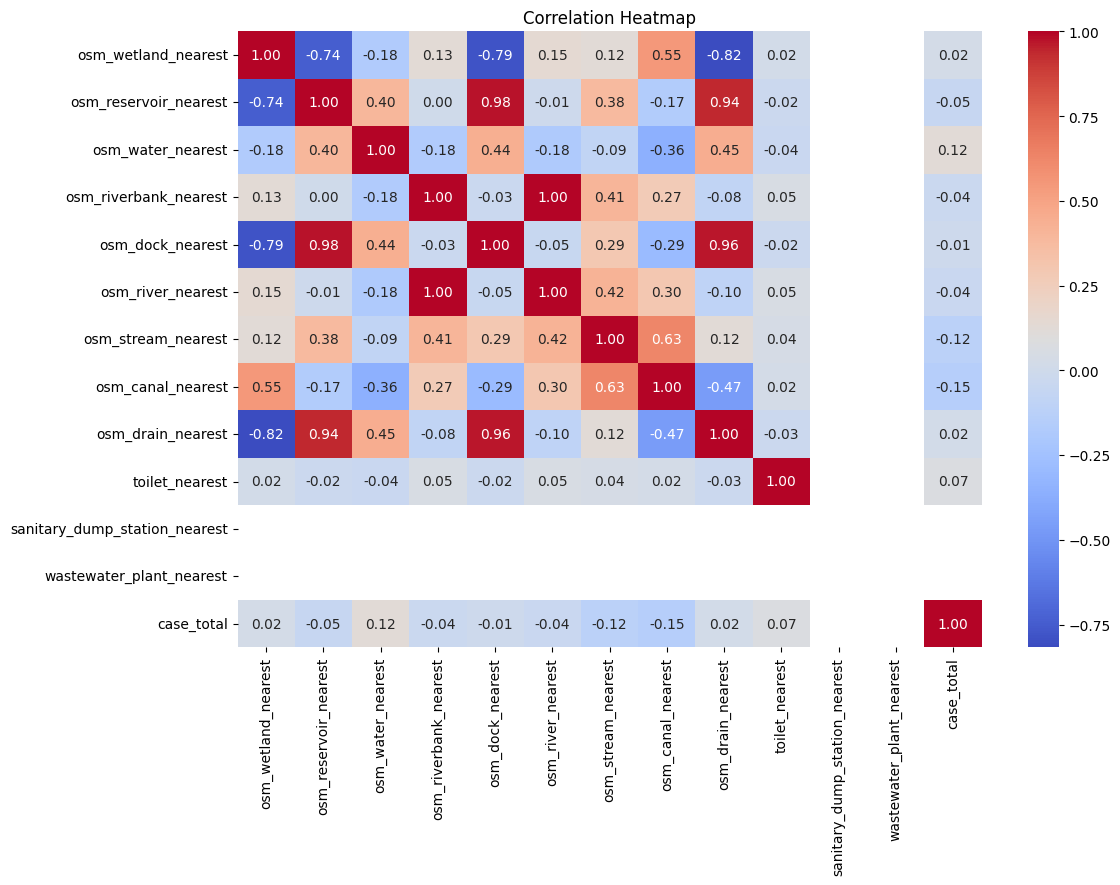

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()